In [ ]:
pip install Totalsegmentator

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import nibabel as nib
from totalsegmentator.python_api import totalsegmentator

input_path = "ct_brain_atlas_1mm.nii.gz"
output_path = "ct_brain"
totalsegmentator(input_path, output_path)

No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024



Downloading: 100%|██████████| 234M/234M [00:03<00:00, 63.8MB/s] 


Download finished. Extracting...


Downloading: 100%|██████████| 234M/234M [00:03<00:00, 61.3MB/s] 


Download finished. Extracting...


Downloading: 100%|██████████| 234M/234M [00:03<00:00, 60.3MB/s] 


Download finished. Extracting...


Downloading: 100%|██████████| 234M/234M [00:03<00:00, 62.4MB/s] 


Download finished. Extracting...


Downloading: 100%|██████████| 234M/234M [00:03<00:00, 62.9MB/s] 


Download finished. Extracting...
Resampling...
  Resampled in 1.21s
Predicting part 1 of 5 ...


100%|██████████| 1/1 [00:10<00:00, 10.18s/it]


Predicting part 2 of 5 ...


100%|██████████| 1/1 [00:09<00:00,  9.59s/it]


Predicting part 3 of 5 ...


100%|██████████| 1/1 [00:09<00:00,  9.31s/it]


Predicting part 4 of 5 ...


100%|██████████| 1/1 [00:09<00:00,  9.42s/it]


Predicting part 5 of 5 ...


100%|██████████| 1/1 [00:09<00:00,  9.56s/it]


  Predicted in 87.29s
Resampling...
Saving segmentations...
  Saved in 6.70s


## Segmentation files

In [2]:
import os
import nibabel as nib
import numpy as np

directory_path = 'ct_brain'
def file_has_segmentation(nii_file):
    img = nib.load(nii_file)
    data = img.get_fdata()
    return np.any(data != 0)
nii_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.nii.gz')]
files_with_segmentation = []
files_without_segmentation = []

for file in nii_files:
    if file_has_segmentation(file):
        files_with_segmentation.append(os.path.basename(file))
    else:
        files_without_segmentation.append(os.path.basename(file))

print("Files with segmentation:")
for file in files_with_segmentation:
    print(file)

print("\nFiles without segmentation:")
for file in files_without_segmentation:
    print(file)

Files with segmentation:
skull.nii.gz
brain.nii.gz

Files without segmentation:
prostate.nii.gz
gluteus_maximus_left.nii.gz
vertebrae_C5.nii.gz
iliopsoas_left.nii.gz
vertebrae_T1.nii.gz
rib_right_7.nii.gz
vertebrae_T12.nii.gz
atrial_appendage_left.nii.gz
gluteus_medius_right.nii.gz
lung_upper_lobe_right.nii.gz
autochthon_right.nii.gz
iliac_vena_right.nii.gz
rib_left_1.nii.gz
scapula_right.nii.gz
rib_left_10.nii.gz
humerus_right.nii.gz
lung_lower_lobe_left.nii.gz
rib_left_12.nii.gz
hip_right.nii.gz
portal_vein_and_splenic_vein.nii.gz
aorta.nii.gz
rib_left_3.nii.gz
vertebrae_L4.nii.gz
brachiocephalic_trunk.nii.gz
femur_right.nii.gz
femur_left.nii.gz
vertebrae_C7.nii.gz
vertebrae_T10.nii.gz
rib_right_5.nii.gz
subclavian_artery_left.nii.gz
vertebrae_T3.nii.gz
rib_right_9.nii.gz
stomach.nii.gz
sternum.nii.gz
common_carotid_artery_left.nii.gz
gallbladder.nii.gz
rib_left_7.nii.gz
duodenum.nii.gz
brachiocephalic_vein_left.nii.gz
vertebrae_T7.nii.gz
lung_lower_lobe_right.nii.gz
thyroid_gland.ni

## Viz

/var/folders/jk/bpt6hw611h1dd0ylmww95l5c0000gp/T/ipykernel_2190/2880472179.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))


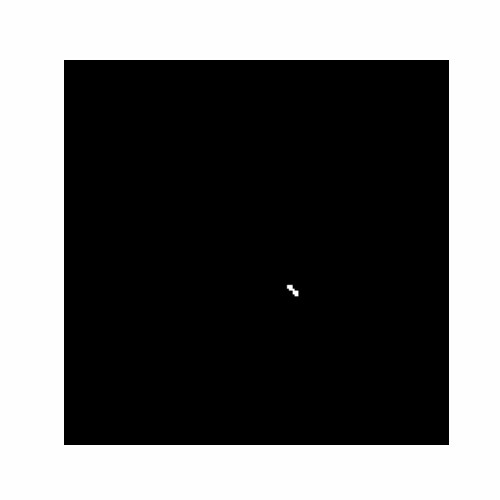

GIF displayed with segmented slices.


In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import imageio
from io import BytesIO
from IPython.display import display, Image

file_path = 'ct_brain/skull.nii.gz'
img = nib.load(file_path)
data = img.get_fdata()

images = []

segmented_slices = []
for i in range(data.shape[2]):  
    if np.any(data[:, :, i] != 0):  
        segmented_slices.append(i)
        plt.figure(figsize=(5, 5))
        plt.imshow(data[:, :, i], cmap='gray')
        plt.axis('off')  
        buf = BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        images.append(imageio.imread(buf)) 
        buf.close()
        plt.close()

if images:
    gif_buffer = BytesIO()
    imageio.mimsave(gif_buffer, images, format='GIF', duration=0.5)
    gif_buffer.seek(0)

    display(Image(data=gif_buffer.read(), format='png'))
    print("GIF displayed with segmented slices.")
else:
    print("No segmented slices found in the data.")